In [5]:
import pandas as pd
import numpy as np

file_path = 'imdb_top_1000.csv'
df = pd.read_csv(file_path)

# Mostrare le prime righe del dataset
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
# Controllare i valori mancanti
missing_values = df.isnull().sum() #valori booleani e somma di questi ultimi

df.isnull().sum()


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
# rimuovo la colonna 'Certificate' dal DataFrame
df.drop(columns=['Certificate'], inplace=True)

df.head()


,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
meta_score_mean = df['Meta_score'].mean()
df.head()

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float) #pulisce la colonna gross, sostituzione delle virgole con una stringa vuota, conversione stringa a numerico float
gross_mean = df['Gross'].mean()

gross_mean


68034750.87364621

In [10]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64') #conversioni in valori numerici di released year, se ci sono valori non numerici vengono trasmormati in NaN
df.head()

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [11]:
df["Runtime"] = df["Runtime"].astype(str).str.replace(" min", "").astype(float).astype('Int64') #cinversione in string, rimozione min, conversione colonna in numeri interi

df.describe()


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.0,1000.0,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.217217,122.891,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.0,45.0,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.0,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.0,119.0,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.0,137.0,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.0,321.0,9.300000,100.000000,2.343110e+06,9.366622e+08


In [12]:
df["Gross"] = df["Gross"].astype(str).str.replace(",", "").astype(float) #conversione gross in string, rimovendo le virgole
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.0,1000.0,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.217217,122.891,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.0,45.0,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.0,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.0,119.0,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.0,137.0,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.0,321.0,9.300000,100.000000,2.343110e+06,9.366622e+08


In [13]:
num_duplicati = df.duplicated().sum() #serie booleana e somma dei duplicati
print("Numero di film duplicati:", num_duplicati)
film_duplicati = df[df.duplicated(keep=False)]
print("Film duplicati:")
print(film_duplicati)

Numero di film duplicati: 0
Film duplicati:
Empty DataFrame
Columns: [Poster_Link, Series_Title, Released_Year, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross]
Index: []


In [14]:
registi_contati = df['Director'].value_counts() #conto il numero di film
registi_multipli = registi_contati[registi_contati > 1] #registi che hanno fatto piu di un film
num_registi_multipli = registi_multipli.count() #conto quanti sono i registi multipli
num_registi_multipli

196

In [15]:
# calcolo la durata media dei film in minuti
durata_media = df["Runtime"].mean()
durata_media



122.891

In [16]:
#calcolo il voto medio IMDB di tutti i film
voto_medio_imdb = df["IMDB_Rating"].mean()
voto_medio_imdb


7.949299999999999

In [17]:
# conto i film con un IMDB rating superiore a 8.5
num_film_alti_voti = df[df["IMDB_Rating"] > 8.5].shape[0]
num_film_alti_voti


33

In [18]:
film_rating_piu_alto = df[df["IMDB_Rating"] == df["IMDB_Rating"].max()]
film_rating_piu_alto

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


In [19]:
film_rating_piu_basso = df[df["IMDB_Rating"] == df["IMDB_Rating"].min()]
film_rating_piu_basso

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
877,https://m.media-amazon.com/images/M/MV5BODQ0M2...,Dark Waters,2019,126,"Biography, Drama, History",7.6,A corporate defense attorney takes on an envir...,73.0,Todd Haynes,Mark Ruffalo,Anne Hathaway,Tim Robbins,Bill Pullman,60408,NaN
878,https://m.media-amazon.com/images/M/MV5BMjIwOT...,Searching,2018,102,"Drama, Mystery, Thriller",7.6,"After his teenage daughter goes missing, a des...",71.0,Aneesh Chaganty,John Cho,Debra Messing,Joseph Lee,Michelle La,140840,26020957.0
879,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,Once Upon a Time... in Hollywood,2019,161,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,83.0,Quentin Tarantino,Leonardo DiCaprio,Brad Pitt,Margot Robbie,Emile Hirsch,551309,142502728.0
880,https://m.media-amazon.com/images/M/MV5BNzk2Nm...,Nelyubov,2017,127,Drama,7.6,A couple going through a divorce must team up ...,86.0,Andrey Zvyagintsev,Maryana Spivak,Aleksey Rozin,Matvey Novikov,Marina Vasileva,29765,566356.0
881,https://m.media-amazon.com/images/M/MV5BMjg4Zm...,The Florida Project,2017,111,Drama,7.6,"Set over one summer, the film follows precocio...",92.0,Sean Baker,Brooklynn Prince,Bria Vinaite,Willem Dafoe,Christopher Rivera,95181,5904366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [20]:
film_duplicati = df[df.duplicated(keep=False)] #false indica che tutte le copie di una riga devono essere considerate un duplicato
if film_duplicati.empty:
    print("Non ci sono film perfettamente duplicati nel dataset.")
else:
    print("Film perfettamente duplicati trovati:")
    print(film_duplicati)

Non ci sono film perfettamente duplicati nel dataset.


In [21]:
df_ratingelevato = df.sort_values(by="IMDB_Rating", ascending=False) #ordina il dataframe in base alla colonna, ordinamento decrescente
top_10_film = df_ratingelevato.head(9)
print("Top 10 film con il rating IMDB più alto:")
print(top_10_film[["Series_Title", "Released_Year", "IMDB_Rating", "Director"]])


Top 10 film con il rating IMDB più alto:
                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption           1994   
1                                       The Godfather           1972   
2                                     The Dark Knight           2008   
3                              The Godfather: Part II           1974   
4                                        12 Angry Men           1957   
5       The Lord of the Rings: The Return of the King           2003   
6                                        Pulp Fiction           1994   
7                                    Schindler's List           1993   
10  The Lord of the Rings: The Fellowship of the Ring           2001   

    IMDB_Rating              Director  
0           9.3        Frank Darabont  
1           9.2  Francis Ford Coppola  
2           9.0     Christopher Nolan  
3           9.0  Francis Ford Coppola  
4           9.0          Sidney Lumet 

In [22]:
# ordino il dataFrame in base al numero di voti in ordine decrescente
df_ordinato_voti = df.sort_values(by="No_of_Votes", ascending=False)
# selezionare i primi 10 film con il maggior numero di voti
top_10_voti = df_ordinato_voti.head(10)
print("Top 10 film con il maggior numero di voti:")
print(top_10_voti[["Series_Title", "Released_Year", "IMDB_Rating", "No_of_Votes", "Director"]])


Top 10 film con il maggior numero di voti:
                                         Series_Title  Released_Year  \
0                            The Shawshank Redemption           1994   
2                                     The Dark Knight           2008   
8                                           Inception           2010   
9                                          Fight Club           1999   
6                                        Pulp Fiction           1994   
11                                       Forrest Gump           1994   
14                                         The Matrix           1999   
10  The Lord of the Rings: The Fellowship of the Ring           2001   
5       The Lord of the Rings: The Return of the King           2003   
1                                       The Godfather           1972   

    IMDB_Rating  No_of_Votes              Director  
0           9.3      2343110        Frank Darabont  
2           9.0      2303232     Christopher Nolan  
8    

In [23]:
# ordino il DataFrame in base al valore di incasso in ordine decrescente
df_ordinato_gross = df.sort_values(by="Gross", ascending=False)
#seleziono i primi 10 film con il maggior incasso
top_10_gross = df_ordinato_gross.head(10)

print("Top 10 film con il maggior incasso:")
print(top_10_gross[["Series_Title", "Released_Year", "IMDB_Rating", "Gross", "Director"]])


Top 10 film con il maggior incasso:
                                   Series_Title  Released_Year  IMDB_Rating  \
477  Star Wars: Episode VII - The Force Awakens           2015          7.9   
59                            Avengers: Endgame           2019          8.4   
623                                      Avatar           2009          7.8   
60                       Avengers: Infinity War           2018          8.4   
652                                     Titanic           1997          7.8   
357                                The Avengers           2012          8.0   
891                               Incredibles 2           2018          7.6   
2                               The Dark Knight           2008          9.0   
582                                   Rogue One           2016          7.8   
63                        The Dark Knight Rises           2012          8.4   

           Gross           Director  
477  936662225.0        J.J. Abrams  
59   858373000.0  

In [24]:
# ordino il dataFrame per IMDB_Rating (dal più alto al più basso)
df_ordinato_rating = df.sort_values(by="IMDB_Rating", ascending=False)

# ordino il dataFrame per No_of_Votes (dal più alto al più basso)
df_ordinato_voti = df.sort_values(by="No_of_Votes", ascending=False)

# stampo i primi 10 film in entrambe le classifiche per confrontare
print(" Top 10 film per Rating IMDB:")
print(df_ordinato_rating.head(10)[["Series_Title", "IMDB_Rating", "No_of_Votes"]])

print("\n Top 10 film per Numero di Voti:")
print(df_ordinato_voti.head(10)[["Series_Title", "IMDB_Rating", "No_of_Votes"]])



 Top 10 film per Rating IMDB:
                                         Series_Title  IMDB_Rating  \
0                            The Shawshank Redemption          9.3   
1                                       The Godfather          9.2   
2                                     The Dark Knight          9.0   
3                              The Godfather: Part II          9.0   
4                                        12 Angry Men          9.0   
5       The Lord of the Rings: The Return of the King          8.9   
6                                        Pulp Fiction          8.9   
7                                    Schindler's List          8.9   
10  The Lord of the Rings: The Fellowship of the Ring          8.8   
11                                       Forrest Gump          8.8   

    No_of_Votes  
0       2343110  
1       1620367  
2       2303232  
3       1129952  
4        689845  
5       1642758  
6       1826188  
7       1213505  
10      1661481  
11      1809221  



In [25]:
# seleziono i titoli dei primi 10 film per entrambe le classifiche
top_10_rating = set(df_ordinato_rating.head(10)["Series_Title"])
top_10_voti = set(df_ordinato_voti.head(10)["Series_Title"])
# identificare i film presenti in entrambe le liste
film_comuni = top_10_rating.intersection(top_10_voti)
film_comuni

{'Forrest Gump',
 'Pulp Fiction',
 'The Dark Knight',
 'The Godfather',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Return of the King',
 'The Shawshank Redemption'}

In [26]:
#creo fasce di rating (ogni 0.5 punti)
df['RatingGroup'] = pd.cut(df['IMDB_Rating'], bins=[7.5, 8, 8.5, 9, 9.5, 10], right=False) #suddivisione della colonno numerica di rating in intervalli di 0.5

#calcolo il numero medio di voti per ciascun gruppo di rating
mean_votes_by_ratinggroup = df.groupby('RatingGroup')['No_of_Votes'].mean() #raggruppo i dati per fasce di rating
print("Numero medio di voti per ogni fascia di rating IMDB:")
print(mean_votes_by_ratinggroup)


Numero medio di voti per ogni fascia di rating IMDB:
RatingGroup
[7.5, 8.0)     1.913273e+05
[8.0, 8.5)     2.863187e+05
[8.5, 9.0)     9.473535e+05
[9.0, 9.5)     1.617301e+06
[9.5, 10.0)             NaN
Name: No_of_Votes, dtype: float64


C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_11540\2403357487.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_votes_by_ratinggroup = df.groupby('RatingGroup')['No_of_Votes'].mean() #raggruppo i dati per fasce di rating


In [27]:
genre_counts = df['Genre'].value_counts()

print("Genere più frequente nel dataset:")
print(genre_counts.head(10))


Genere più frequente nel dataset:
Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64


In [28]:
mean_rating_by_genre = df.groupby('Genre')['IMDB_Rating'].mean() #raggruppo per genere e poi seleziono il rating per calcolare la media
print("Rating medio per genere:")
print(mean_rating_by_genre)


Rating medio per genere:
Genre
Action, Adventure               8.180000
Action, Adventure, Biography    7.900000
Action, Adventure, Comedy       7.910000
Action, Adventure, Crime        7.600000
Action, Adventure, Drama        8.150000
                                  ...   
Mystery, Romance, Thriller      8.300000
Mystery, Sci-Fi, Thriller       7.800000
Mystery, Thriller               7.977778
Thriller                        7.800000
Western                         8.350000
Name: IMDB_Rating, Length: 202, dtype: float64


In [29]:
mean_Runtime_by_genre = df.groupby('Genre')['Runtime'].mean()
print(" Durata media dei film per ogni genere:")
print(mean_Runtime_by_genre)

 Durata media dei film per ogni genere:
Genre
Action, Adventure                    127.8
Action, Adventure, Biography          95.0
Action, Adventure, Comedy            131.0
Action, Adventure, Crime             113.0
Action, Adventure, Drama        154.071429
                                   ...    
Mystery, Romance, Thriller           128.0
Mystery, Sci-Fi, Thriller            114.5
Mystery, Thriller               119.111111
Thriller                             108.0
Western                             148.25
Name: Runtime, Length: 202, dtype: Float64


In [30]:
mean_Gross_by_genre = df.groupby('Genre')['Gross'].mean()
print(" Media profitto per genere")
print(mean_Gross_by_genre)


 Media profitto per genere
Genre
Action, Adventure               2.295072e+08
Action, Adventure, Biography             NaN
Action, Adventure, Comedy       2.133793e+08
Action, Adventure, Crime                 NaN
Action, Adventure, Drama        2.224030e+08
                                    ...     
Mystery, Romance, Thriller      3.200000e+06
Mystery, Sci-Fi, Thriller       3.575990e+07
Mystery, Thriller               3.320600e+07
Thriller                        1.755074e+07
Western                         1.455538e+07
Name: Gross, Length: 202, dtype: float64


In [31]:
films_per_year = df['Released_Year'].value_counts()
most_frequent_year = films_per_year.idxmax() #indice è l'anno e il valore è il numero di film
num_films = films_per_year.max() #valore massimo di film della serie
print(f"l'anno con il maggior numero di film nel dataset è il {most_frequent_year} con {num_films} film.")


l'anno con il maggior numero di film nel dataset è il 2014 con 32 film.


In [32]:
df['Decadegroup']= pd.cut(df['Released_Year'], bins=range(1920,2026,10), right=False) #suddivisione della colonno numerica di rating in intervalli di 0.5
#calcolo il numero medio di voti per ciascun gruppo di rating
mean_rating_by_decade = df.groupby('Decadegroup')['IMDB_Rating'].mean() #raggruppo i dati per fasce di rating
print("Rating IMBD per decennio:")
print(mean_rating_by_decade)


Rating IMBD per decennio:
Decadegroup
[1920, 1930)    8.127273
[1930, 1940)    7.966667
[1940, 1950)    8.025714
[1950, 1960)    8.058929
[1960, 1970)    7.973973
[1970, 1980)    7.969737
[1980, 1990)    7.953933
[1990, 2000)    7.963333
[2000, 2010)    7.899578
[2010, 2020)    7.924380
Name: IMDB_Rating, dtype: float64


C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_11540\2697465890.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_decade = df.groupby('Decadegroup')['IMDB_Rating'].mean() #raggruppo i dati per fasce di rating


In [34]:
rating_piu_alto_decennio = df.groupby('Decadegroup')['IMDB_Rating'].idxmax()
rating_piu_alto_decennio


C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_11540\4234765423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_piu_alto_decennio = df.groupby('Decadegroup')['IMDB_Rating'].idxmax()


AssertionError: 

In [ ]:
df.loc[rating_piu_alto_decennio, ["Series_Title","Released_Year","IMDB_Rating"]]

In [ ]:
director_counts = df['Director'].value_counts() #conta quante volte appare ogni regista nel dataset

print("Registi con il maggior numero di film nel dataset:")
print(director_counts.head(10)) 

In [ ]:
rating_medio_regista= df.groupby('Director')['IMDB_Rating'].mean()
rating_medio_regista

In [ ]:
conteggio_attori = pd.concat([df['Star1'],df['Star2'],df['Star3'],df['Star4']])
conteggio_attori


In [ ]:
conta_tutti=conteggio_attori.value_counts()
conta_tutti.head(9)

In [ ]:
conteggio_attoriprova1 = df['Star1'].value_counts()
conteggio_attoriprova2 = df['Star2'].value_counts()
conteggio_attoriprova3 = df['Star3'].value_counts()
conteggio_attoriprova4 = df['Star4'].value_counts()

conteggio_totale_attori= (conteggio_attoriprova1
                          .add(conteggio_attoriprova2, fill_value=0)
                          .add(conteggio_attoriprova3, fill_value=0)
                          .add(conteggio_attoriprova4, fill_value=0))
conteggio_totale_attori.sort_values(ascending=False).head(9)

In [ ]:
df['Scoregroup']= pd.cut(df['Meta_score'], bins=range(28,100,5), right=False) #suddivisione della colonno numerica di rating in intervalli di 0.5
#calcolo il numero medio di voti per ciascun gruppo di rating
count_score = df.groupby('Scoregroup')['Series_Title'].count() #raggruppo i film
count_score

In [ ]:
df.describe()

In [ ]:
film_alto_rating = df[df['Meta_score'] >=90]
attori = pd.concat([df['Star1'],df['Star2'],df['Star3'],df['Star4']]).value_counts()
attori     


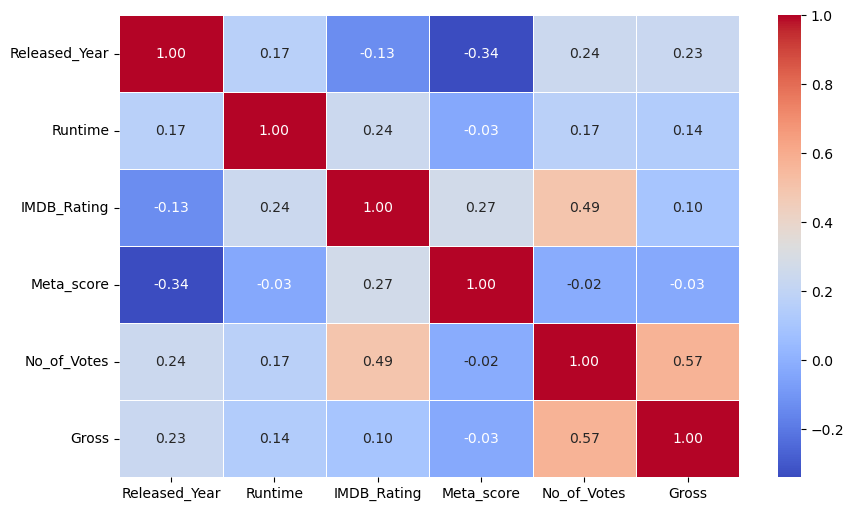

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.select_dtypes(include=["number"]).corr()
correlation_matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

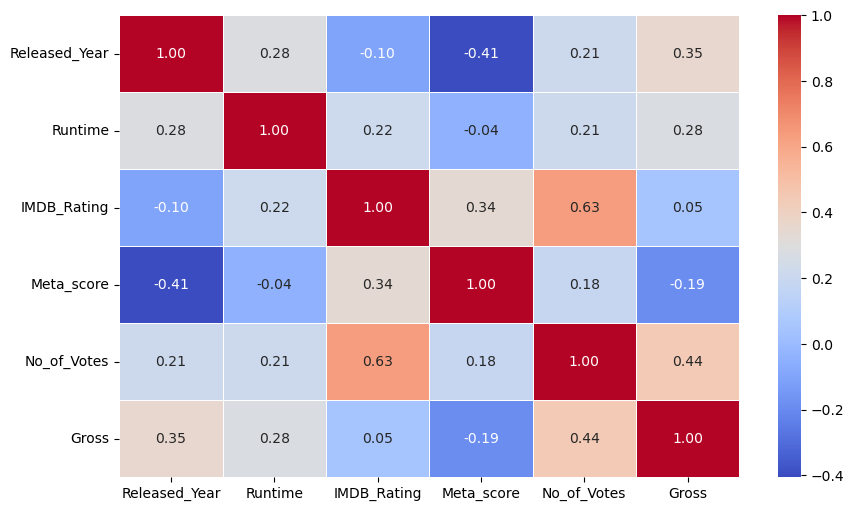

In [64]:
dfold = df[df["Released_Year"]<1980]

correlation_matrix = dfold.select_dtypes(include=["number"]).corr()
correlation_matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

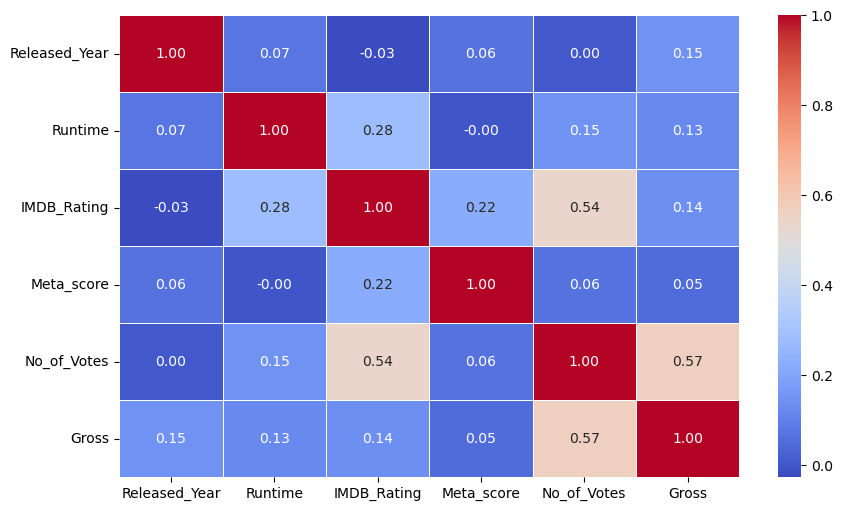

In [62]:
dfold = df[df["Released_Year"]>1980]

correlation_matrix = dfold.select_dtypes(include=["number"]).corr()
correlation_matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

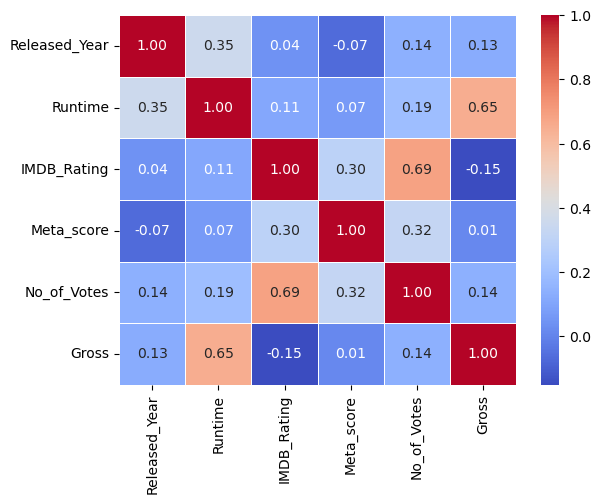

In [60]:
dfold = df[df["Released_Year"]<1960]

correlation_matrix = dfold.select_dtypes(include=["number"]).corr()
correlation_matrix
# plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [50]:
import pandas as pd
import numpy as np
df['5anni']= pd.cut(df['Released_Year'], bins=range(1920,2026,5), right=True) #suddivisione della colonno numerica di rating in intervalli di 0.5
#calcolo il numero medio di voti per ciascun gruppo di rating
mean_gross_by_5anni = df.groupby('5anni')['Meta_score'].mean() #raggruppo i dati per fasce di rating
print(mean_gross_by_5anni)

5anni
(1920, 1925]    97.000000
(1925, 1930]    93.000000
(1930, 1935]    89.818182
(1935, 1940]    92.846154
(1940, 1945]    92.625000
(1945, 1950]    92.666667
(1950, 1955]    87.600000
(1955, 1960]    91.160000
(1960, 1965]    83.928571
(1965, 1970]    80.703704
(1970, 1975]    82.486486
(1975, 1980]    79.029412
(1980, 1985]    77.588235
(1985, 1990]    75.687500
(1990, 1995]    75.214286
(1995, 2000]    72.810811
(2000, 2005]    72.878505
(2005, 2010]    74.750000
(2010, 2015]    77.476636
(2015, 2020]    78.500000
(2020, 2025]          NaN
Name: Meta_score, dtype: float64


C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_11540\3008787064.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_gross_by_5anni = df.groupby('5anni')['Meta_score'].mean() #raggruppo i dati per fasce di rating


In [74]:
import pandas as pd
import numpy as np
df['10metascore']= pd.cut(df['Meta_score'], bins=range(0,101,10), right=True) #suddivisione della colonno numerica di rating in intervalli di 0.5
#calcolo il numero medio di voti per ciascun gruppo di rating
mean_No_of_Votes_by_10metascore = df.groupby('10metascore')['No_of_Votes'].mean() #raggruppo i dati per fasce di rating
print(mean_No_of_Votes_by_10metascore)

10metascore
(0, 10]                NaN
(10, 20]               NaN
(20, 30]     297171.000000
(30, 40]     139165.000000
(40, 50]     189686.941176
(50, 60]     318827.510204
(60, 70]     372879.425532
(70, 80]     308727.493976
(80, 90]     308693.260000
(90, 100]    284357.833333
Name: No_of_Votes, dtype: float64


C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_11540\1128879885.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_No_of_Votes_by_10metascore = df.groupby('10metascore')['No_of_Votes'].mean() #raggruppo i dati per fasce di rating


In [ ]:
import pandas as pd
import numpy as np
df['10metascore']= pd.cut(df['Meta_score'], bins=range(0,101,10), right=True) #suddivisione della colonno numerica di rating in intervalli di 0.5
#calcolo il numero medio di voti per ciascun gruppo di rating
mean_No_of_Votes_by_10metascore = df.groupby('10metascore')['No_of_Votes'].mean() #raggruppo i dati per fasce di rating
print(mean_No_of_Votes_by_10metascore)